In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    
def draw_styled_landmarks(image, results):
    # Face connections
    mp_drawing.draw_landmarks(
        image, 
        results.face_landmarks, 
        mp_face_mesh.FACEMESH_TESSELATION,  # Holistic yerine FaceMesh kullanımı
        mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
    )

    # Pose connections
    mp_drawing.draw_landmarks(
        image, 
        results.pose_landmarks, 
        mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
    )

    # Left hand connections
    mp_drawing.draw_landmarks(
        image, 
        results.left_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
    )

    # Right hand connections
    mp_drawing.draw_landmarks(
        image, 
        results.right_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )

In [3]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

33


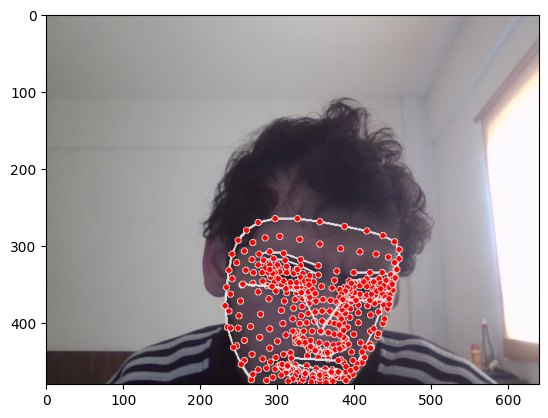

In [4]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
print(len(results.pose_landmarks.landmark))


#Extract Keypoint Values

In [6]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

result_test = extract_keypoints(results)
print(result_test)

[ 0.55740297  0.85626662 -2.28166676 ...  0.          0.
  0.        ]


In [7]:
np.save('0', result_test)

In [8]:
np.load('0.npy')

array([ 0.55740297,  0.85626662, -2.28166676, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
#DATASET            *******************************************


In [9]:
import os
import numpy as np

# Path for dataset
DATASET_PATH = os.path.join('dataset')

# Actions that we try to detect
actions = ['hello', 'thanks', 'iloveyou', 'reason', 'yes','zero','one','two','three','four','five','six','seven','eight','nine']

# Subfolders for train, validation, and test
subfolders = ['train', 'validation', 'test']

# Create dataset folder if it doesn't exist
if not os.path.exists(DATASET_PATH):
    os.makedirs(DATASET_PATH)

# Create action folders and subfolders
for subfolder in subfolders:
    for action in actions:
        action_path = os.path.join(DATASET_PATH, subfolder, action)
        if not os.path.exists(action_path):
            os.makedirs(action_path)

print("Klasörler başarıyla oluşturuldu.")


Klasörler başarıyla oluşturuldu.


In [25]:
#100 video kayıt
import os
import cv2
import mediapipe as mp
import time

# Path for videos
VIDEOS_PATH = os.path.join('videos')

# Ayarlar
fps = 15  # 15 FPS
sequence_length = fps * 2  # 2 saniye (15 FPS * 2 saniye = 30 çerçeve)

# Videolar klasörü oluştur
if not os.path.exists(VIDEOS_PATH):
    os.makedirs(VIDEOS_PATH)

# Mediapipe holistic modeli başlat
mp_holistic = mp.solutions.holistic

# Kamerayı aç
cap = cv2.VideoCapture(0)

# Kamera çözünürlüğü ayarla
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Çözünürlük bilgilerini al
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Kamera çözünürlüğü: {frame_width}x{frame_height}, FPS: {fps}")

# Mediapipe ile çalışmaya başla
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for video_num in range(1, 201):  # 100 video kaydetmek için döngü
        video_path = os.path.join(VIDEOS_PATH, f'video{video_num}.mp4')
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

        # Geri sayımı kamerada göster
        countdown_start = time.time()
        while time.time() - countdown_start < 2:
            ret, frame = cap.read()
            if not ret:
                print("Kameradan görüntü alınamadı!")
                break

            remaining_time = int(2 - (time.time() - countdown_start))
            cv2.putText(frame, f"Recording starts in {remaining_time}", (50, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.putText(frame, f"Camera FPS: {fps}", (15, 450),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam Feed", frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        frame_count = 0

        while frame_count < sequence_length:
            start_frame_time = time.time()

            # Kameradan görüntü al
            ret, frame = cap.read()
            if not ret:
                print("Kameradan görüntü alınamadı!")
                break

            # Mediapipe ile işleme
            image, results = frame, holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Landmarks çiz
            if results.pose_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

            if results.face_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)

            if results.left_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            if results.right_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            # Videoya kaydet
            out.write(frame)
            frame_count += 1

            # Görüntüyü ekranda göster
            cv2.putText(frame, f"Recording video{video_num} ({frame_count}/{sequence_length})", (15, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(frame, f"Camera FPS: {fps}", (15, 450),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam Feed", frame)

            # Çerçeve işlem süresini hesapla ve bekleme ekle
            elapsed_time = time.time() - start_frame_time
            delay = max(1 / fps - elapsed_time, 0)
            time.sleep(delay)

            # Çıkış için 'q' tuşuna bas
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        out.release()

cap.release()
cv2.destroyAllWindows()


Kamera çözünürlüğü: 640x480, FPS: 15


In [4]:
import os
import cv2
import mediapipe as mp
import time

# Path for videos
VIDEOS_PATH = os.path.join('videos')

# Ayarlar
fps = 15  # 15 FPS
sequence_length = fps * 2  # 2 saniye (15 FPS * 2 saniye = 30 çerçeve)

# Videolar klasörü oluştur
if not os.path.exists(VIDEOS_PATH):
    os.makedirs(VIDEOS_PATH)

# Mediapipe holistic modeli başlat
mp_holistic = mp.solutions.holistic

# Kamerayı aç
cap = cv2.VideoCapture(0)

# Kamera çözünürlüğü ayarla
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Çözünürlük bilgilerini al
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Kamera çözünürlüğü: {frame_width}x{frame_height}, FPS: {fps}")

# Mediapipe ile çalışmaya başla
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for video_num in range(1, 201):  # 100 video kaydetmek için döngü
        video_path = os.path.join(VIDEOS_PATH, f'video{video_num}.mp4')
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

        frame_count = 0

        while frame_count < sequence_length:
            start_frame_time = time.time()

            # Kameradan görüntü al
            ret, frame = cap.read()
            if not ret:
                print("Kameradan görüntü alınamadı!")
                break

            # Mediapipe ile işleme
            image, results = frame, holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Landmarks çiz
            if results.pose_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

            if results.face_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)

            if results.left_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            if results.right_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            # Videoya kaydet
            out.write(frame)
            frame_count += 1

            # Görüntüyü ekranda göster
            cv2.putText(frame, f"Recording video{video_num} ({frame_count}/{sequence_length})", (15, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(frame, f"Camera FPS: {fps}", (15, 450),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam Feed", frame)

            # Çerçeve işlem süresini hesapla ve bekleme ekle
            elapsed_time = time.time() - start_frame_time
            delay = max(1 / fps - elapsed_time, 0)
            time.sleep(delay)

            # Çıkış için 'q' tuşuna bas
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        out.release()

cap.release()
cv2.destroyAllWindows()


Kamera çözünürlüğü: 640x480, FPS: 15


In [2]:
cap.release()
cv2.destroyAllWindows()


In [1]:
# video to .npy

import os
import cv2
import numpy as np
import mediapipe as mp

# Paths
BASE_PATH = 'videos_for_set'  # Ana klasör
OUTPUT_PATH = 'dataset'  # Verilerin bölüneceği ana klasör

# Mediapipe Holistic modeli başlat
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Anahtar noktaları çıkarmak için bir yardımcı fonksiyon
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

# Train, validation ve test için oranlar
TRAIN_VIDEOS = list(range(1, 141))  # İlk 140 video train
VALIDATION_VIDEOS = list(range(141, 171))  # 141-170 arası validation
TEST_VIDEOS = list(range(171, 201))  # 171-200 arası test

# Dataset klasör yapısını oluştur
subfolders = ['train', 'validation', 'test']
actions = sorted(os.listdir(BASE_PATH))  # Actions, videos_for_set içindeki klasör adlarıdır

for subfolder in subfolders:
    for action in actions:
        folder_path = os.path.join(OUTPUT_PATH, subfolder, action)
        os.makedirs(folder_path, exist_ok=True)

# Videoları bölüştürme ve işlem yapma
def process_videos(action, video_range, destination):
    action_path = os.path.join(BASE_PATH, action)
    dest_path = os.path.join(OUTPUT_PATH, destination, action)

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        for video_num in video_range:
            video_name = f"video{video_num}.mp4"
            video_path = os.path.join(action_path, video_name)

            if os.path.exists(video_path):
                cap = cv2.VideoCapture(video_path)

                # Video için bir klasör oluştur
                video_folder = os.path.join(dest_path, str(video_num))
                os.makedirs(video_folder, exist_ok=True)

                frame_num = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Mediapipe ile işlem yap
                    image, results = frame, holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

                    # Anahtar noktaları çıkar
                    keypoints = extract_keypoints(results)

                    # Kaydet
                    npy_name = f"frame{frame_num}.npy"
                    npy_path = os.path.join(video_folder, npy_name)
                    np.save(npy_path, keypoints)

                    frame_num += 1

                cap.release()

# Her aksiyonu işle
for action in actions:
    # Train verileri
    process_videos(action, TRAIN_VIDEOS, 'train')

    # Validation verileri
    process_videos(action, VALIDATION_VIDEOS, 'validation')

    # Test verileri
    process_videos(action, TEST_VIDEOS, 'test')

print("Videolar başarıyla işlendi ve bölüştürüldü.")


Videolar başarıyla işlendi ve bölüştürüldü.


In [7]:
#dataset kontrol

import os
import numpy as np
from tensorflow.keras.utils import to_categorical

# Paths and parameters
DATASET_PATH = 'dataset'  # Dataset'in ana yolu
sequence_length = 30  # Her videonun karesi (frame) uzunluğu

# Actions listesini dinamik olarak oluştur
actions = sorted(os.listdir(os.path.join(DATASET_PATH, 'train')))
print("Actions:", actions)

# Label mapping
label_map = {label: num for num, label in enumerate(actions)}
print("Label Map:", label_map)

# Veri yükleme
def load_data(subset):
    sequences, labels = [], []
    subset_path = os.path.join(DATASET_PATH, subset)
    for action in actions:
        action_path = os.path.join(subset_path, action)
        for sequence in os.listdir(action_path):  # Her bir video için
            sequence_path = os.path.join(action_path, sequence)
            window = []
            for frame_num in range(sequence_length):
                npy_path = os.path.join(sequence_path, f"frame{frame_num}.npy")
                if os.path.exists(npy_path):  # Eğer kare mevcutsa yükle
                    res = np.load(npy_path)
                    window.append(res)
            if len(window) == sequence_length:  # Eksik kareleri atla
                sequences.append(window)
                labels.append(label_map[action])
    return np.array(sequences), to_categorical(labels).astype(int)

# Dataset'ten verileri yükle
X_train, y_train = load_data('train')
X_val, y_val = load_data('validation')
X_test, y_test = load_data('test')

# Yüklenen verilerin boyutlarını kontrol et
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Actions: ['eight', 'five', 'four', 'hello', 'iloveyou', 'nine', 'one', 'reason', 'seven', 'six', 'thanks', 'three', 'two', 'yes', 'zero']
Label Map: {'eight': 0, 'five': 1, 'four': 2, 'hello': 3, 'iloveyou': 4, 'nine': 5, 'one': 6, 'reason': 7, 'seven': 8, 'six': 9, 'thanks': 10, 'three': 11, 'two': 12, 'yes': 13, 'zero': 14}


KeyboardInterrupt: 

In [83]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

# Örnek: 15 etiketin bulunduğu liste
actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

# TensorBoard logları
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Model tanımlama
model = Sequential()
model.add(
    LSTM(64, return_sequences=True, activation='tanh', 
         input_shape=(30, 1629))  # 30: zaman adımı, 1629: feature boyutu
)
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Çıkış katmanı: 15 sınıf => len(actions) 
model.add(Dense(len(actions), activation='softmax'))

model.compile(
    optimizer=Adam(), 
    loss='categorical_crossentropy', 
    metrics=['categorical_accuracy']
)

# Eğitim
model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    callbacks=[tb_callback]
)

model.summary()


Epoch 1/200
66/66 [==============================] - 4s 15ms/step - loss: 2.3619 - categorical_accuracy: 0.1776
Epoch 2/200
66/66 [==============================] - 1s 15ms/step - loss: 1.9347 - categorical_accuracy: 0.2890
Epoch 3/200
66/66 [==============================] - 1s 17ms/step - loss: 1.6163 - categorical_accuracy: 0.4405
Epoch 4/200
66/66 [==============================] - 1s 18ms/step - loss: 1.5257 - categorical_accuracy: 0.4638
Epoch 5/200
66/66 [==============================] - 1s 15ms/step - loss: 1.3413 - categorical_accuracy: 0.5248
Epoch 6/200
66/66 [==============================] - 1s 14ms/step - loss: 1.2077 - categorical_accuracy: 0.5681
Epoch 7/200
66/66 [==============================] - 1s 15ms/step - loss: 1.1111 - categorical_accuracy: 0.6148
Epoch 8/200
66/66 [==============================] - 1s 15ms/step - loss: 0.9667 - categorical_accuracy: 0.6705
Epoch 9/200
66/66 [==============================] - 1s 15ms/step - loss: 0.9975 - categorical_accuracy:

In [13]:
res = model.predict(X_test)


In [14]:
actions[np.argmax(res[4])]


'six'

In [15]:
actions[np.argmax(y_test[4])]


'eight'

In [84]:
model.save('action.h5')


Epoch 1/200
33/33 [==============================] - 6s 56ms/step - loss: 11.7296 - categorical_accuracy: 0.2871 - val_loss: 10.2565 - val_categorical_accuracy: 0.6311 - lr: 3.0000e-04
Epoch 2/200
33/33 [==============================] - 1s 28ms/step - loss: 8.1829 - categorical_accuracy: 0.5690 - val_loss: 8.1147 - val_categorical_accuracy: 0.7289 - lr: 3.0000e-04
Epoch 3/200
33/33 [==============================] - 1s 29ms/step - loss: 6.2462 - categorical_accuracy: 0.7462 - val_loss: 6.6617 - val_categorical_accuracy: 0.8222 - lr: 3.0000e-04
Epoch 4/200
33/33 [==============================] - 1s 28ms/step - loss: 5.1841 - categorical_accuracy: 0.8157 - val_loss: 5.6191 - val_categorical_accuracy: 0.8289 - lr: 3.0000e-04
Epoch 5/200
33/33 [==============================] - 1s 28ms/step - loss: 4.5420 - categorical_accuracy: 0.8610 - val_loss: 4.8129 - val_categorical_accuracy: 0.8844 - lr: 3.0000e-04
Epoch 6/200
33/33 [==============================] - 1s 26ms/step - loss: 4.1080 - 

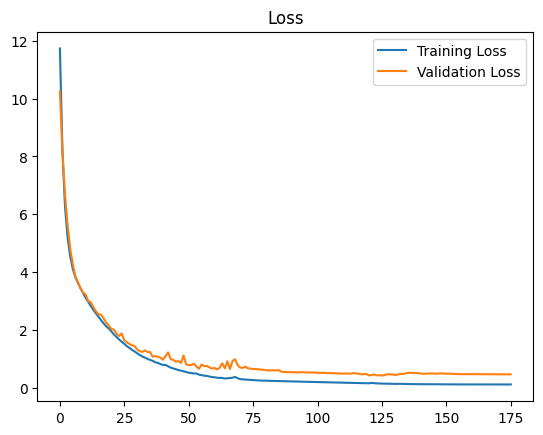

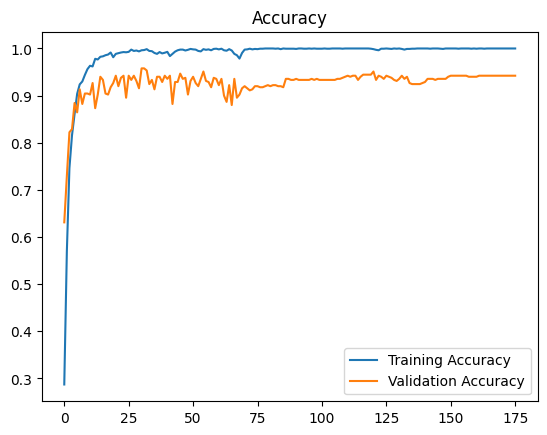

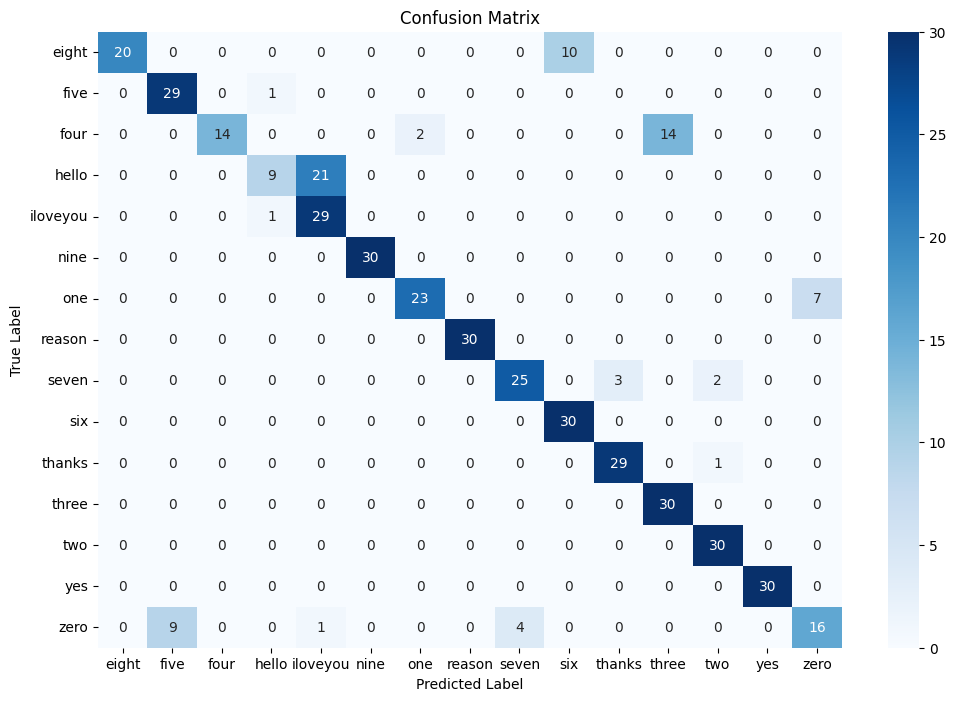

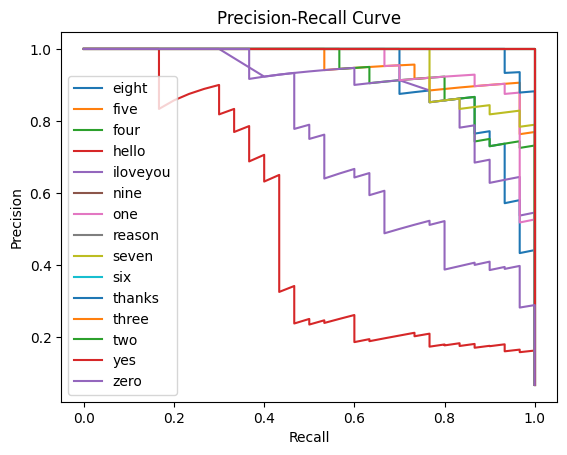

ROC-AUC Score: 0.9876
Classification Report:
              precision    recall  f1-score   support

       eight       1.00      0.67      0.80        30
        five       0.76      0.97      0.85        30
        four       1.00      0.47      0.64        30
       hello       0.82      0.30      0.44        30
    iloveyou       0.57      0.97      0.72        30
        nine       1.00      1.00      1.00        30
         one       0.92      0.77      0.84        30
      reason       1.00      1.00      1.00        30
       seven       0.86      0.83      0.85        30
         six       0.75      1.00      0.86        30
      thanks       0.91      0.97      0.94        30
       three       0.68      1.00      0.81        30
         two       0.91      1.00      0.95        30
         yes       1.00      1.00      1.00        30
        zero       0.70      0.53      0.60        30

    accuracy                           0.83       450
   macro avg       0.86      0.83  

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

# 1. Veri artırma ve veri ön işleme
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

# Z-score standardizasyonu
mean = np.mean(X_train_reshaped, axis=0)
std = np.std(X_train_reshaped, axis=0)
X_train_reshaped = (X_train_reshaped - mean) / (std + 1e-6)
X_val_reshaped = (X_val_reshaped - mean) / (std + 1e-6)
X_test_reshaped = (X_test_reshaped - mean) / (std + 1e-6)

# 2. Giriş boyutunu kontrol et
input_dim = X_train_reshaped.shape[2]

# 3. TensorBoard logları
log_dir = os.path.join('Logs_LSTM_Enhanced')
tb_callback = TensorBoard(log_dir=log_dir)

# 4. Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# 5. Reduce Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6, verbose=1)

# 6. Daha düşük başlangıç öğrenme oranı
optimizer = Adam(learning_rate=0.0003)

# 7. Sınıf ağırlıkları
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)
class_weights = dict(enumerate(class_weights))

# 8. Model tanımlama
model = Sequential()

# LSTM Katmanları
model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(30, input_dim), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(64, return_sequences=True, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Yoğun Katmanlar
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(len(actions), activation='softmax'))

# Model derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# 9. Model eğitimi
history = model.fit(
    X_train_reshaped, y_train,
    epochs=200,
    batch_size=64,
    validation_data=(X_val_reshaped, y_val),
    class_weight=class_weights,
    callbacks=[tb_callback, early_stopping, reduce_lr]
)

# Model kaydetme
model.save('lstm_enhanced_model.h5')

# Eğitim Kayıp Grafiği
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Eğitim Doğruluk Grafiği
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Test değerlendirmesi
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=actions, yticklabels=actions, cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Eğrisi
precision = {}
recall = {}
for i in range(len(actions)):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    plt.plot(recall[i], precision[i], label=f"{actions[i]}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# ROC-AUC Skoru
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Sınıflandırma Raporu
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=actions))

# Weighted F-Score
f_scores = classification_report(y_true, y_pred_classes, target_names=actions, output_dict=True)['weighted avg']['f1-score']
print(f"Weighted Average F-Score: {f_scores:.4f}")


Otomatik Hesaplanan Sınıf Ağırlıkları: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0}
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 30, 128)           625664    
                                                                 
 batch_normalization_120 (Ba  (None, 30, 128)          512       
 tchNormalization)                                               
                                                                 
 dropout_120 (Dropout)       (None, 30, 128)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 30, 64)            24640     
                                                                 
 batch_normalization_121 (Ba  (None, 30, 64)           256       
 tchNormalization)  

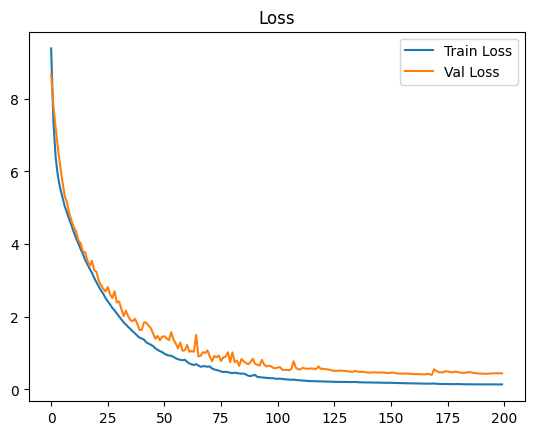

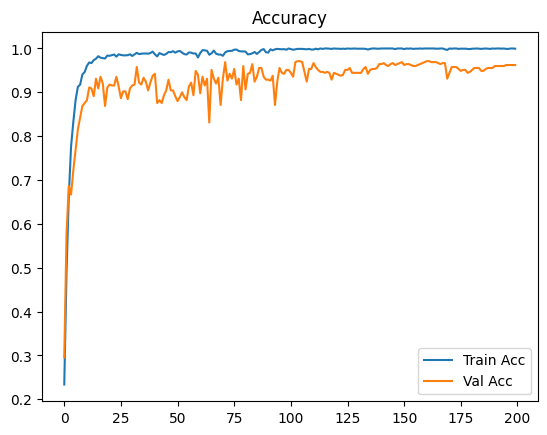

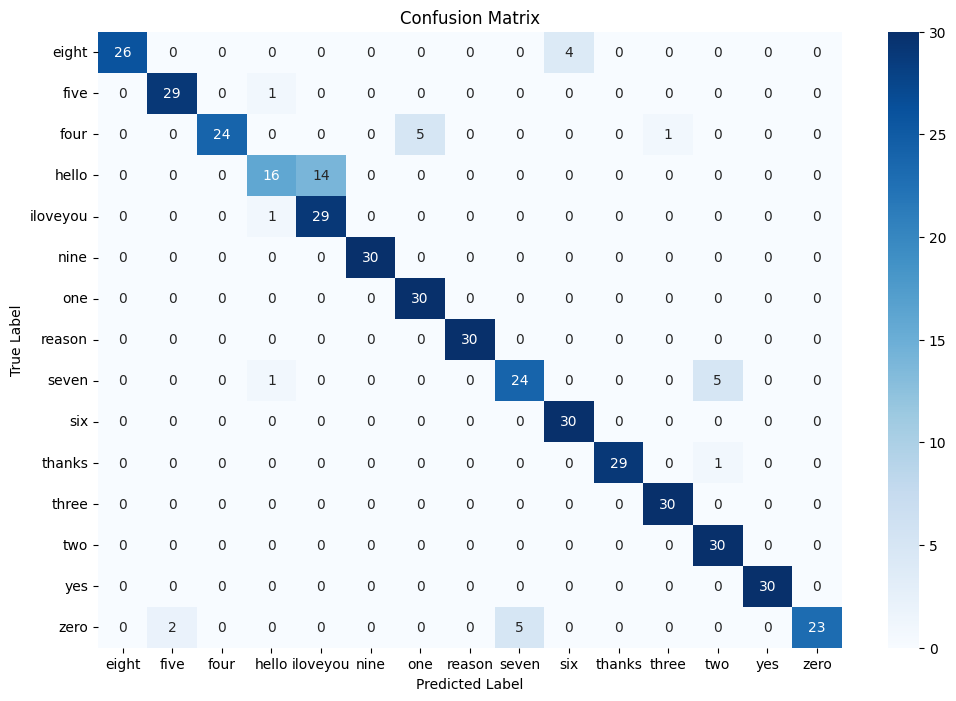

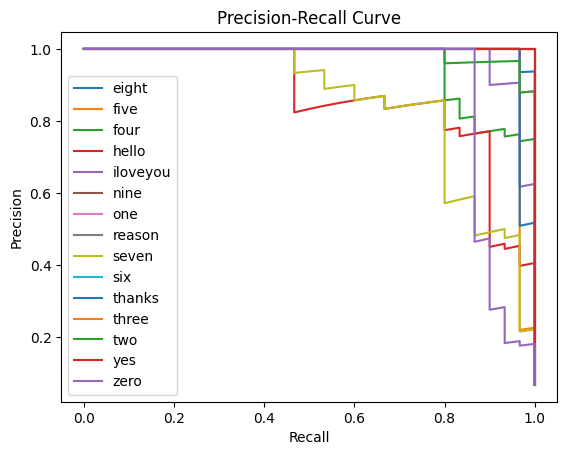

ROC-AUC Score: 0.9947
Classification Report:
              precision    recall  f1-score   support

       eight       1.00      0.87      0.93        30
        five       0.94      0.97      0.95        30
        four       1.00      0.80      0.89        30
       hello       0.84      0.53      0.65        30
    iloveyou       0.67      0.97      0.79        30
        nine       1.00      1.00      1.00        30
         one       0.86      1.00      0.92        30
      reason       1.00      1.00      1.00        30
       seven       0.83      0.80      0.81        30
         six       0.88      1.00      0.94        30
      thanks       1.00      0.97      0.98        30
       three       0.97      1.00      0.98        30
         two       0.83      1.00      0.91        30
         yes       1.00      1.00      1.00        30
        zero       1.00      0.77      0.87        30

    accuracy                           0.91       450
   macro avg       0.92      0.91  

In [32]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

# -----------------------------------------------------------
# 1) Veri Ön İşleme (Z-Score vb.)
# -----------------------------------------------------------
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], -1)
X_val_reshaped   = X_val.reshape(X_val.shape[0], X_val.shape[1], -1)
X_test_reshaped  = X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

mean = np.mean(X_train_reshaped, axis=0)
std  = np.std(X_train_reshaped, axis=0)

X_train_reshaped = (X_train_reshaped - mean) / (std + 1e-6)
X_val_reshaped   = (X_val_reshaped - mean) / (std + 1e-6)
X_test_reshaped  = (X_test_reshaped - mean) / (std + 1e-6)

input_dim = X_train_reshaped.shape[2]  # Özellik sayısı

# -----------------------------------------------------------
# 2) Callback’ler ve Optimizasyon
# -----------------------------------------------------------
log_dir = "Logs_CNN_LSTM"
tb_callback = TensorBoard(log_dir=log_dir)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-6,
    verbose=1
)

optimizer = Adam(learning_rate=0.0003)

# -----------------------------------------------------------
# 3) Sınıf Ağırlıkları (Opsiyonel)
# -----------------------------------------------------------
y_train_integers = np.argmax(y_train, axis=1)
auto_class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_integers),
    y=y_train_integers
)
class_weights = dict(enumerate(auto_class_weights))
print("Otomatik Hesaplanan Sınıf Ağırlıkları:", class_weights)

# -----------------------------------------------------------
# 4) Hibrit CNN + LSTM Modeli (Daha Az Regularization)
# -----------------------------------------------------------
model = Sequential()

# --- CNN BLOĞU ---
model.add(Conv1D(filters=128,
                 kernel_size=3,
                 activation='relu',
                 padding='same',
                 input_shape=(X_train_reshaped.shape[1], input_dim),
                 kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(filters=64,
                 kernel_size=3,
                 activation='relu',
                 padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(MaxPooling1D(pool_size=2, strides=2))

# --- LSTM BLOĞU ---
model.add(LSTM(128, return_sequences=True, activation='tanh',
               kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(64, return_sequences=True, activation='tanh',
               kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False, activation='tanh',
               kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# --- YOĞUN KATMANLAR ---
model.add(Dense(128, activation='relu',
                kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(len(actions), activation='softmax'))

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

model.summary()

# -----------------------------------------------------------
# 5) Model Eğitimi
# -----------------------------------------------------------
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=200,
    batch_size=64,
    validation_data=(X_val_reshaped, y_val),
    class_weight=class_weights,  # veya None
    callbacks=[tb_callback, early_stopping, reduce_lr]
)

model.save("hybrid_cnn_lstm_model.h5")

# -----------------------------------------------------------
# 6) Eğitim Süreci Grafikleri
# -----------------------------------------------------------
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['categorical_accuracy'], label='Train Acc')
plt.plot(history.history['val_categorical_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

# -----------------------------------------------------------
# 7) Test Değerlendirmesi
# -----------------------------------------------------------
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=actions, yticklabels=actions, cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Eğrisi
precision = {}
recall = {}
for i, label_name in enumerate(actions):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    plt.plot(recall[i], precision[i], label=label_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# ROC-AUC Skoru
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Sınıflandırma Raporu
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=actions))

# Weighted F-Score
f_scores = classification_report(
    y_true, y_pred_classes, target_names=actions, output_dict=True
)['weighted avg']['f1-score']
print(f"Weighted Average F-Score: {f_scores:.4f}")

In [ ]:
#TEST

In [21]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf

actions = [
    "eight","five","four","hello","iloveyou",
    "nine","one","reason","seven","six",
    "thanks","three","two","yes","zero"
]

model = tf.keras.models.load_model("action.h5")

colors = [(245, 117, 16)] * len(actions)

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Face connections
    mp_drawing.draw_landmarks(
        image, 
        results.face_landmarks, 
        mp_face_mesh.FACEMESH_TESSELATION,  # Holistic yerine FaceMesh kullanımı
        mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
    )

    # Pose connections
    mp_drawing.draw_landmarks(
        image, 
        results.pose_landmarks, 
        mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
    )

    # Left hand connections
    mp_drawing.draw_landmarks(
        image, 
        results.left_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
    )

    # Right hand connections
    mp_drawing.draw_landmarks(
        image, 
        results.right_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )
    
np.load('0.npy')
    
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

def prob_viz(res, actions, input_frame, colors):
    # Tahmin olasılıklarını ekrana basmak
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # Her sınıf için çubuk
        cv2.rectangle(output_frame, (0, 60 + num*40), 
                      (int(prob*100), 90 + num*40), colors[num], -1)
        cv2.putText(output_frame, f"{actions[num]} {prob:.2f}", 
                    (0, 85 + num*40), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, (255,255,255), 1, cv2.LINE_AA)
    return output_frame


sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 15)
with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # 1. Mediapipe
        image, results = mediapipe_detection(frame, holistic)
        
        # 2. Landmark çizimi
        draw_styled_landmarks(image, results)

        # 3. Keypoint çıkart, sequence'e ekle
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Son 30 frame

        # 4. Model tahmini (30 frame dolduğunda)
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print("Tahmin:", actions[np.argmax(res)], " - Score:", res[np.argmax(res)])
            
            predictions.append(np.argmax(res))

            # Aynı sınıf son 10 tahminde tekrar ediyorsa ve threshold'u aşıyorsa
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    # cümlede tekrarlanmaması için kontrol
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            
            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Olasılıkları ekrana çizmek
            image = prob_viz(res, actions, image, colors)

        # 5. Son tahminleri ekrana yaz
        cv2.rectangle(image, (0,0), (640, 40), (245,117,16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        # q ile çık
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Tahmin: seven  - Score: 0.99992275
Tahmin: seven  - Score: 0.99991655
Tahmin: seven  - Score: 0.9999119
Tahmin: seven  - Score: 0.9999051
Tahmin: seven  - Score: 0.9998981
Tahmin: seven  - Score: 0.99988985
Tahmin: seven  - Score: 0.99988353
Tahmin: seven  - Score: 0.99987555
Tahmin: seven  - Score: 0.99986565
Tahmin: seven  - Score: 0.9998555
Tahmin: seven  - Score: 0.99982375
Tahmin: seven  - Score: 0.9997775
Tahmin: seven  - Score: 0.9996766
Tahmin: seven  - Score: 0.9994253
Tahmin: seven  - Score: 0.99810696
Tahmin: seven  - Score: 0.9889579
Tahmin: seven  - Score: 0.93881327
Tahmin: seven  - Score: 0.53817225
Tahmin: zero  - Score: 0.95977837
Tahmin: zero  - Score: 0.9973236
Tahmin: zero  - Score: 0.9995646
Tahmin: zero  - Score: 0.9998429
Tahmin: zero  - Score: 0.9999094
Tahmin: zero  - Score: 0.99991906
Tahmin: zero  - Score: 0.99991894
Tahmin: zero  - Score: 0.9999157
Tahmin: zero  - Score: 0.9999056
Tahmin: zero  - Score: 0.99987817
Tahmin: zero  - Score: 0.9998254
Tahmin: zer

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
import time

# ==============================
# 1) Model ve Aksiyon Listesi
# ==============================
model = tf.keras.models.load_model("action.h5")  # Eğittiğiniz model dosyanız

actions = [
    "eight","five","four","hello","iloveyou",
    "nine","one","reason","seven","six",
    "thanks","three","two","yes","zero"
]  # 15 sınıf

# ==============================
# 2) Mediapipe Ayarları
# ==============================
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

def mediapipe_detection(image, holistic_model):
    """
    BGR görüntüyü RGB'ye çevirip Mediapipe Holistic ile işliyor.
    Sonrasında tekrar BGR'ye dönüyor.
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB
    image.flags.writeable = False
    results = holistic_model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # RGB -> BGR
    return image, results

def draw_styled_landmarks(image, results):
    """
    Yüz, pose, sol el, sağ el üzerinde landmark çizimleri yapar.
    """

    # FACE
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_face_mesh.FACEMESH_TESSELATION,  # FaceMesh çizimleri
        mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
    )

    # POSE
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
    )

    # LEFT HAND
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
    )

    # RIGHT HAND
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )

def extract_keypoints(results):
    """
    Eğitimde kullandığınız POSE (33), FACE (468), LH (21), RH (21)
    -> her noktada (x, y, z)
    -> Toplam 1662 boyutlu vektör
    """
    pose = np.zeros(33 * 3)
    face = np.zeros(468 * 3)
    lh   = np.zeros(21  * 3)
    rh   = np.zeros(21  * 3)

    if results.pose_landmarks:
        pose = np.array([[res.x, res.y, res.z] 
                         for res in results.pose_landmarks.landmark]
                        ).flatten()
    if results.face_landmarks:
        face = np.array([[res.x, res.y, res.z]
                         for res in results.face_landmarks.landmark]
                        ).flatten()
    if results.left_hand_landmarks:
        lh = np.array([[res.x, res.y, res.z]
                       for res in results.left_hand_landmarks.landmark]
                      ).flatten()
    if results.right_hand_landmarks:
        rh = np.array([[res.x, res.y, res.z]
                       for res in results.right_hand_landmarks.landmark]
                      ).flatten()

    return np.concatenate([pose, face, lh, rh])

# ==============================
# 3) Kamera
# ==============================
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
) as holistic_model:
    
    while True:
        # Kullanıcıdan başlama sinyali:
        user_input = input("2 saniyelik kayda başlamak için Enter'a basın, (q ile çık): ")
        if user_input.lower() == 'q':
            print("Program sonlandırılıyor...")
            break

        # --- 3 Saniyelik Geri Sayım ---
        for count in range(3, 0, -1):
            ret, frame = cap.read()
            if not ret:
                print("Kamera okunamadı!")
                break

            cv2.putText(frame, f"Recording starts in {count}", (50, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam", frame)
            cv2.waitKey(1)
            time.sleep(1)  # 1 saniye bekle

        # --- 30 Frame Yakalama (2 saniye, 15 FPS) ---
        sequence = []
        fps = 15
        for i in range(30):
            start_time = time.time()

            ret, frame = cap.read()
            if not ret:
                print("Kamera okunamadı!")
                break

            # 1) Mediapipe Detection
            image, results = mediapipe_detection(frame, holistic_model)
            # 2) Landmark çizimi (face + eller + pose)
            draw_styled_landmarks(image, results)

            # 3) extract_keypoints
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)

            # Ekrana göster
            cv2.putText(image, f"Frame: {i+1}/30", (10,30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
            
            cv2.imshow("Webcam", image)

            # 15 FPS'e uymak için gecikme
            elapsed = time.time() - start_time
            wait_time = max(0, (1.0/fps) - elapsed)
            time.sleep(wait_time)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        # 30 frame tamamlandıysa tahmin yap
        if len(sequence) == 30:
            seq_array = np.expand_dims(sequence, axis=0)
            res = model.predict(seq_array)[0]  # (15,)

            predicted_class = np.argmax(res)
            predicted_label = actions[predicted_class]
            confidence = res[predicted_class]
            print(f"\nTahmin: {predicted_label} | Skor: {confidence:.2f}\n")

cap.release()
cv2.destroyAllWindows()



Tahmin: zero | Skor: 0.95


Tahmin: zero | Skor: 0.96


Tahmin: zero | Skor: 0.99


Tahmin: zero | Skor: 1.00

Program sonlandırılıyor...


In [4]:
cap.release()
cv2.destroyAllWindows()

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# ================ 1) Veri Yükleme ================
DATASET_PATH = 'dataset'  # Dataset klasör yolunuz
sequence_length = 30       # Her videonun karesi (frame) sayısı

# 1a) Actions listesini çek
actions = sorted(os.listdir(os.path.join(DATASET_PATH, 'train')))
print("Actions:", actions)

# 1b) Label map oluştur
label_map = {label: num for num, label in enumerate(actions)}
print("Label Map:", label_map)

def load_data(subset):
    sequences, labels = [], []
    subset_path = os.path.join(DATASET_PATH, subset)
    for action in actions:
        action_path = os.path.join(subset_path, action)
        for sequence in os.listdir(action_path):  # video klasörleri (1, 2, 3 vs.)
            sequence_path = os.path.join(action_path, sequence)
            window = []
            for frame_num in range(sequence_length):
                npy_path = os.path.join(sequence_path, f"frame{frame_num}.npy")
                if os.path.exists(npy_path):
                    res = np.load(npy_path)
                    window.append(res)
            if len(window) == sequence_length:
                sequences.append(window)
                labels.append(label_map[action])
    X = np.array(sequences)
    y = to_categorical(labels).astype(int)
    return X, y

# Verileri yükle
X_train, y_train = load_data('train')
X_val,   y_val   = load_data('validation')
X_test,  y_test  = load_data('test')

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Actions: ['eight', 'five', 'four', 'hello', 'iloveyou', 'nine', 'one', 'reason', 'seven', 'six', 'thanks', 'three', 'two', 'yes', 'zero']
Label Map: {'eight': 0, 'five': 1, 'four': 2, 'hello': 3, 'iloveyou': 4, 'nine': 5, 'one': 6, 'reason': 7, 'seven': 8, 'six': 9, 'thanks': 10, 'three': 11, 'two': 12, 'yes': 13, 'zero': 14}
Train shape: (2100, 30, 1629), Validation shape: (450, 30, 1629), Test shape: (450, 30, 1629)



Model başarıyla yüklendi!

=== Validation Set Evaluation ===
15/15 [==============================] - 1s 7ms/step - loss: 0.5646 - categorical_accuracy: 0.8911
Val Loss: 0.5646, Val Accuracy: 0.8911
'Emin değilim' sayısı (Validation): 25/450


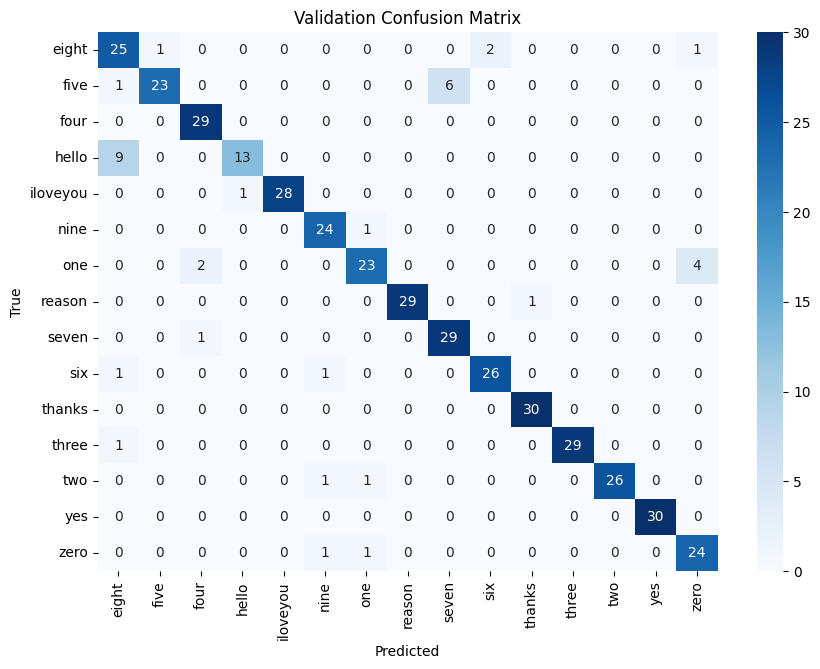


Validation Classification Report:
              precision    recall  f1-score   support

       eight       0.68      0.83      0.75        30
        five       0.96      0.77      0.85        30
        four       0.91      0.97      0.94        30
       hello       0.93      0.43      0.59        30
    iloveyou       1.00      0.93      0.97        30
        nine       0.89      0.80      0.84        30
         one       0.88      0.77      0.82        30
      reason       1.00      0.97      0.98        30
       seven       0.83      0.97      0.89        30
         six       0.93      0.87      0.90        30
      thanks       0.97      1.00      0.98        30
       three       1.00      0.97      0.98        30
         two       1.00      0.87      0.93        30
         yes       1.00      1.00      1.00        30
        zero       0.83      0.80      0.81        30
emin değilim       0.00      0.00      0.00         0

    accuracy                           0.86  

c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 6ms/step - loss: 0.8757 - categorical_accuracy: 0.8244
Test Loss: 0.8757, Test Accuracy: 0.8244
'Emin değilim' sayısı (Test): 17/450


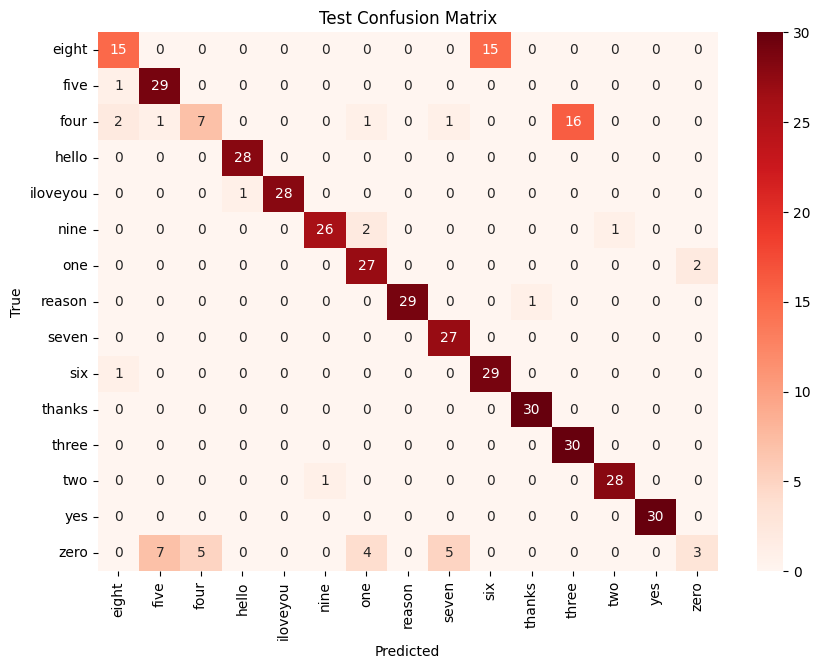


Test Classification Report:
              precision    recall  f1-score   support

       eight       0.79      0.50      0.61        30
        five       0.78      0.97      0.87        30
        four       0.58      0.23      0.33        30
       hello       0.97      0.93      0.95        30
    iloveyou       1.00      0.93      0.97        30
        nine       0.96      0.87      0.91        30
         one       0.79      0.90      0.84        30
      reason       1.00      0.97      0.98        30
       seven       0.82      0.90      0.86        30
         six       0.66      0.97      0.78        30
      thanks       0.97      1.00      0.98        30
       three       0.65      1.00      0.79        30
         two       0.97      0.93      0.95        30
         yes       1.00      1.00      1.00        30
        zero       0.60      0.10      0.17        30
emin değilim       0.00      0.00      0.00         0

    accuracy                           0.81       4

c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# ================ 2) Modeli Yükleme ================
# Eğittiğiniz modelin adını girin (örn. action.h5 veya hybrid_cnn_lstm_model.h5)
model = tf.keras.models.load_model("hibritt.h5")
print("\nModel başarıyla yüklendi!\n")


# ================ 3) Threshold Bazlı Tahmin Fonksiyonu ================
def predict_with_threshold(model, X, threshold=0.6):
    """
    Tahminler için bir threshold uygular.
    Threshold'u karşılamayan tahminleri 'emin değilim' olarak işaretler.
    """
    predictions = model.predict(X)
    results = []
    for prediction in predictions:
        max_prob = np.max(prediction)
        if max_prob > threshold:
            results.append(np.argmax(prediction))
        else:
            results.append("emin değilim")  # Belirsiz tahminler için
    return results


# ================ 4) Validation Set Performansı ================
print("=== Validation Set Evaluation ===")
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

# Tahminler
y_val_pred = model.predict(X_val)
y_val_pred_thresholded = predict_with_threshold(model, X_val, threshold=0.6)

# "Emin değilim" oranı
undecided_val_count = sum(1 for p in y_val_pred_thresholded if p == "emin değilim")
print(f"'Emin değilim' sayısı (Validation): {undecided_val_count}/{len(X_val)}")

# Tahmin edilen ve gerçek etiketlerin uzunluklarını eşitlemek
valid_indices = [i for i, p in enumerate(y_val_pred_thresholded) if p != "emin değilim"]
y_val_pred_classes = [y_val_pred_thresholded[i] for i in valid_indices]
y_val_true_filtered = [np.argmax(y_val[i]) for i in valid_indices]

# Karışıklık Matrisi (Confusion Matrix)
conf_val = confusion_matrix(y_val_true_filtered, y_val_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_val, annot=True, fmt='d', 
            xticklabels=actions, yticklabels=actions, cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nValidation Classification Report:")
valid_pred_classes = [p if p != "emin değilim" else len(actions) for p in y_val_pred_thresholded]
valid_actions = actions + ["emin değilim"]
print(classification_report(np.argmax(y_val, axis=1), valid_pred_classes, target_names=valid_actions))


# ================ 5) Test Set Performansı ================
print("\n=== Test Set Evaluation ===")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Tahminler
y_test_pred = model.predict(X_test)
y_test_pred_thresholded = predict_with_threshold(model, X_test, threshold=0.6)

# "Emin değilim" oranı
undecided_test_count = sum(1 for p in y_test_pred_thresholded if p == "emin değilim")
print(f"'Emin değilim' sayısı (Test): {undecided_test_count}/{len(X_test)}")

# Tahmin edilen ve gerçek etiketlerin uzunluklarını eşitlemek
test_indices = [i for i, p in enumerate(y_test_pred_thresholded) if p != "emin değilim"]
y_test_pred_classes = [y_test_pred_thresholded[i] for i in test_indices]
y_test_true_filtered = [np.argmax(y_test[i]) for i in test_indices]

# Karışıklık Matrisi (Confusion Matrix)
conf_test = confusion_matrix(y_test_true_filtered, y_test_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_test, annot=True, fmt='d', 
            xticklabels=actions, yticklabels=actions, cmap="Reds")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nTest Classification Report:")
test_pred_classes = [p if p != "emin değilim" else len(actions) for p in y_test_pred_thresholded]
test_actions = actions + ["emin değilim"]
print(classification_report(np.argmax(y_test, axis=1), test_pred_classes, target_names=test_actions))


# ROC-AUC (Opsiyonel, çoklu sınıf)
try:
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    print(f"Test ROC-AUC Score: {roc_test:.4f}")
except:
    pass



Model başarıyla yüklendi!

=== Validation Set Evaluation ===
15/15 [==============================] - 1s 8ms/step - loss: 0.7437 - categorical_accuracy: 0.8911
Val Loss: 0.7437, Val Accuracy: 0.8911
'Emin değilim' sayısı (Validation): 7/450


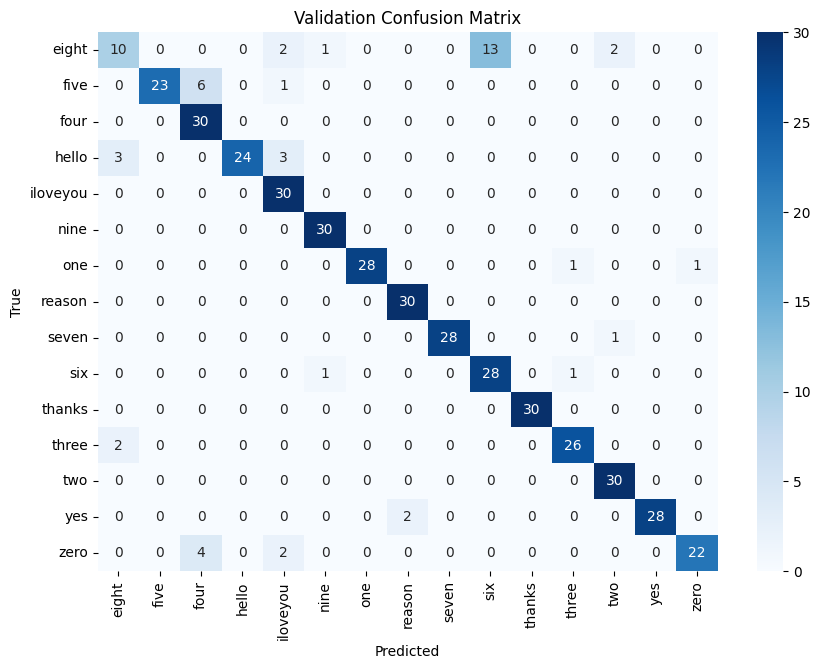


Validation Classification Report:
              precision    recall  f1-score   support

       eight       0.67      0.33      0.44        30
        five       1.00      0.77      0.87        30
        four       0.75      1.00      0.86        30
       hello       1.00      0.80      0.89        30
    iloveyou       0.79      1.00      0.88        30
        nine       0.94      1.00      0.97        30
         one       1.00      0.93      0.97        30
      reason       0.94      1.00      0.97        30
       seven       1.00      0.93      0.97        30
         six       0.68      0.93      0.79        30
      thanks       1.00      1.00      1.00        30
       three       0.93      0.87      0.90        30
         two       0.91      1.00      0.95        30
         yes       1.00      0.93      0.97        30
        zero       0.96      0.73      0.83        30
emin değilim       0.00      0.00      0.00         0

    accuracy                           0.88  

c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 10ms/step - loss: 1.6263 - categorical_accuracy: 0.8289
Test Loss: 1.6263, Test Accuracy: 0.8289
'Emin değilim' sayısı (Test): 5/450


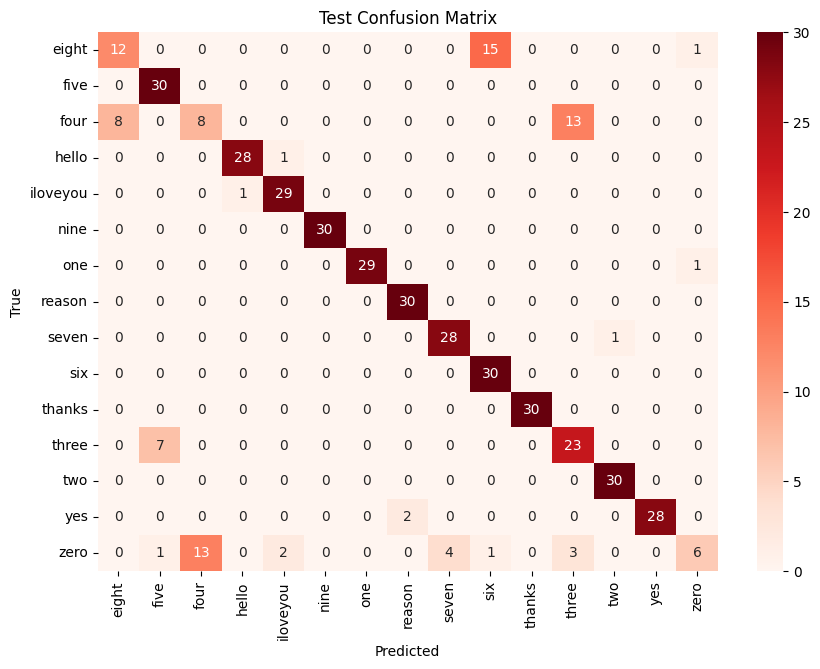


Test Classification Report:
              precision    recall  f1-score   support

       eight       0.60      0.40      0.48        30
        five       0.79      1.00      0.88        30
        four       0.38      0.27      0.31        30
       hello       0.97      0.93      0.95        30
    iloveyou       0.91      0.97      0.94        30
        nine       1.00      1.00      1.00        30
         one       1.00      0.97      0.98        30
      reason       0.94      1.00      0.97        30
       seven       0.88      0.93      0.90        30
         six       0.65      1.00      0.79        30
      thanks       1.00      1.00      1.00        30
       three       0.59      0.77      0.67        30
         two       0.97      1.00      0.98        30
         yes       1.00      0.93      0.97        30
        zero       0.75      0.20      0.32        30
emin değilim       0.00      0.00      0.00         0

    accuracy                           0.82       4

c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nesri\anaconda3\envs\py38_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# ================ 2) Modeli Yükleme ================
# Eğittiğiniz modelin adını girin (örn. action.h5 veya hybrid_cnn_lstm_model.h5)
model = tf.keras.models.load_model("action.h5")
print("\nModel başarıyla yüklendi!\n")


# ================ 3) Threshold Bazlı Tahmin Fonksiyonu ================
def predict_with_threshold(model, X, threshold=0.6):
    """
    Tahminler için bir threshold uygular.
    Threshold'u karşılamayan tahminleri 'emin değilim' olarak işaretler.
    """
    predictions = model.predict(X)
    results = []
    for prediction in predictions:
        max_prob = np.max(prediction)
        if max_prob > threshold:
            results.append(np.argmax(prediction))
        else:
            results.append("emin değilim")  # Belirsiz tahminler için
    return results


# ================ 4) Validation Set Performansı ================
print("=== Validation Set Evaluation ===")
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

# Tahminler
y_val_pred = model.predict(X_val)
y_val_pred_thresholded = predict_with_threshold(model, X_val, threshold=0.6)

# "Emin değilim" oranı
undecided_val_count = sum(1 for p in y_val_pred_thresholded if p == "emin değilim")
print(f"'Emin değilim' sayısı (Validation): {undecided_val_count}/{len(X_val)}")

# Tahmin edilen ve gerçek etiketlerin uzunluklarını eşitlemek
valid_indices = [i for i, p in enumerate(y_val_pred_thresholded) if p != "emin değilim"]
y_val_pred_classes = [y_val_pred_thresholded[i] for i in valid_indices]
y_val_true_filtered = [np.argmax(y_val[i]) for i in valid_indices]

# Karışıklık Matrisi (Confusion Matrix)
conf_val = confusion_matrix(y_val_true_filtered, y_val_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_val, annot=True, fmt='d', 
            xticklabels=actions, yticklabels=actions, cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nValidation Classification Report:")
valid_pred_classes = [p if p != "emin değilim" else len(actions) for p in y_val_pred_thresholded]
valid_actions = actions + ["emin değilim"]
print(classification_report(np.argmax(y_val, axis=1), valid_pred_classes, target_names=valid_actions))


# ================ 5) Test Set Performansı ================
print("\n=== Test Set Evaluation ===")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Tahminler
y_test_pred = model.predict(X_test)
y_test_pred_thresholded = predict_with_threshold(model, X_test, threshold=0.6)

# "Emin değilim" oranı
undecided_test_count = sum(1 for p in y_test_pred_thresholded if p == "emin değilim")
print(f"'Emin değilim' sayısı (Test): {undecided_test_count}/{len(X_test)}")

# Tahmin edilen ve gerçek etiketlerin uzunluklarını eşitlemek
test_indices = [i for i, p in enumerate(y_test_pred_thresholded) if p != "emin değilim"]
y_test_pred_classes = [y_test_pred_thresholded[i] for i in test_indices]
y_test_true_filtered = [np.argmax(y_test[i]) for i in test_indices]

# Karışıklık Matrisi (Confusion Matrix)
conf_test = confusion_matrix(y_test_true_filtered, y_test_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_test, annot=True, fmt='d', 
            xticklabels=actions, yticklabels=actions, cmap="Reds")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nTest Classification Report:")
test_pred_classes = [p if p != "emin değilim" else len(actions) for p in y_test_pred_thresholded]
test_actions = actions + ["emin değilim"]
print(classification_report(np.argmax(y_test, axis=1), test_pred_classes, target_names=test_actions))


# ROC-AUC (Opsiyonel, çoklu sınıf)
try:
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    print(f"Test ROC-AUC Score: {roc_test:.4f}")
except:
    pass


In [16]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

# Örnek: 15 etiket
actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

# TensorBoard logları
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Hibrit CNN + LSTM Modeli
model = Sequential()

# --- CNN Bloğu ---
# 1) Conv1D
model.add(Conv1D(
    filters=64, 
    kernel_size=3, 
    activation='relu', 
    padding='same',
    input_shape=(30, 1629)  # 30 zaman adımı, 1629 feature
))
# 2) MaxPooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

# --- LSTM Bloğu ---
model.add(LSTM(64, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))

# --- Dense Katmanları ---
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Çıkış Katmanı: 15 sınıf
model.add(Dense(len(actions), activation='softmax'))

# Model derleme
model.compile(
    optimizer=Adam(), 
    loss='categorical_crossentropy', 
    metrics=['categorical_accuracy']
)

model.summary()

#Eğitim
# Örneğin:
model.fit(
     X_train, y_train,
     validation_data=(X_val, y_val),
     epochs=200,
     batch_size=64,
     callbacks=[tb_callback]
 )

model.save("hibritt.h5")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            312832    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 15, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [29]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Örnek 15 etiket
actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

# Zayıf Performanslı Sınıflar
ultra_weak_classes = ['eight', 'four', 'zero']
ultra_weak = 4.0
weak_weight = 3.0

# Class weight sözlüğü
class_weights = {}
for i, label in enumerate(actions):
    if label in ultra_weak_classes:
        class_weights[i] = ultra_weak
    else:
        class_weights[i] = 1.0

print("Manuel Class Weights:", class_weights)

# TensorBoard ve EarlyStopping
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Hibrit CNN + LSTM Modeli
model = Sequential()

# --- CNN BLOĞU ---
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(30, 1629)))
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

# --- LSTM BLOĞU ---
model.add(LSTM(64, return_sequences=True, activation='tanh', dropout=0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh', dropout=0.2))

# --- DENSE KATMANLAR ---
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

# Çıkış Katmanı: 15 sınıf
model.add(Dense(len(actions), activation='softmax'))

# Model derleme
model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

model.summary()

# Eğitim
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=64,
    callbacks=[tb_callback, early_stopping],
    class_weight=class_weights
)

model.save("hibritt.h5")


Manuel Class Weights: {0: 4.0, 1: 1.0, 2: 4.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 4.0}
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 30, 64)            312832    
                                                                 
 dropout_10 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_14 (Conv1D)          (None, 30, 64)            12352     
                                                                 
 dropout_11 (Dropout)        (None, 30, 64)            0         
                                                                 
 conv1d_15 (Conv1D)          (None, 30, 64)            12352     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1

In [159]:
#100 video kayıt
import os
import cv2
import mediapipe as mp
import time

# Path for videos
VIDEOS_PATH = os.path.join('videos')

# Ayarlar
fps = 15  # 15 FPS
sequence_length = fps * 2  # 2 saniye (15 FPS * 2 saniye = 30 çerçeve)

# Videolar klasörü oluştur
if not os.path.exists(VIDEOS_PATH):
    os.makedirs(VIDEOS_PATH)

# Mediapipe holistic modeli başlat
mp_holistic = mp.solutions.holistic

# Kamerayı aç
cap = cv2.VideoCapture(0)

# Kamera çözünürlüğü ayarla
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Çözünürlük bilgilerini al
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Kamera çözünürlüğü: {frame_width}x{frame_height}, FPS: {fps}")

# Mediapipe ile çalışmaya başla
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for video_num in range(1, 4):  # 100 video kaydetmek için döngü
        video_path = os.path.join(VIDEOS_PATH, f'video{video_num}.mp4')
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

        # Geri sayımı kamerada göster
        countdown_start = time.time()
        while time.time() - countdown_start < 5:
            ret, frame = cap.read()
            if not ret:
                print("Kameradan görüntü alınamadı!")
                break

            remaining_time = int(5 - (time.time() - countdown_start))
            cv2.putText(frame, f"Recording starts in {remaining_time}", (50, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.putText(frame, f"Camera FPS: {fps}", (15, 450),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam Feed", frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        frame_count = 0

        while frame_count < sequence_length:
            start_frame_time = time.time()

            # Kameradan görüntü al
            ret, frame = cap.read()
            if not ret:
                print("Kameradan görüntü alınamadı!")
                break

            # Mediapipe ile işleme
            image, results = frame, holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Landmarks çiz
            if results.pose_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

            if results.face_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)

            if results.left_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            if results.right_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            # Videoya kaydet
            out.write(frame)
            frame_count += 1

            # Görüntüyü ekranda göster
            cv2.putText(frame, f"Recording video{video_num} ({frame_count}/{sequence_length})", (15, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(frame, f"Camera FPS: {fps}", (15, 450),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow("Webcam Feed", frame)

            # Çerçeve işlem süresini hesapla ve bekleme ekle
            elapsed_time = time.time() - start_frame_time
            delay = max(1 / fps - elapsed_time, 0)
            time.sleep(delay)

            # Çıkış için 'q' tuşuna bas
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        out.release()

cap.release()
cv2.destroyAllWindows()


Kamera çözünürlüğü: 640x480, FPS: 15


In [160]:
import os
import cv2
import numpy as np
import mediapipe as mp

# Paths
VIDEO_DIR = 'videos'  # Videoların bulunduğu klasör
OUTPUT_DIR = 'frames'  # Çıktı klasörü

# Mediapipe Holistic modeli başlat
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Anahtar noktaları çıkarmak için bir yardımcı fonksiyon
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

# Çıktı klasörünü oluştur
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Videoları işle
video_files = [f for f in os.listdir(VIDEO_DIR) if f.endswith('.mp4')]

for video_idx, video_file in enumerate(video_files, start=1):
    video_path = os.path.join(VIDEO_DIR, video_file)
    video_output_dir = os.path.join(OUTPUT_DIR, str(video_idx))
    os.makedirs(video_output_dir, exist_ok=True)

    print(f"İşleniyor: {video_file} -> {video_output_dir}")

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        cap = cv2.VideoCapture(video_path)
        frame_num = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Mediapipe ile işlem yap
            image, results = frame, holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            # Anahtar noktaları çıkar
            keypoints = extract_keypoints(results)

            # İlk 30 frame'i işle
            if frame_num < 30:
                npy_name = f"frame{frame_num}.npy"
                npy_path = os.path.join(video_output_dir, npy_name)
                np.save(npy_path, keypoints)
                frame_num += 1
            else:
                break

        cap.release()
        print(f"{frame_num} frame işlendi ve {video_output_dir} içine kaydedildi.")

print("Tüm videolar başarıyla işlendi.")


İşleniyor: video1.mp4 -> frames\1
30 frame işlendi ve frames\1 içine kaydedildi.
İşleniyor: video2.mp4 -> frames\2
30 frame işlendi ve frames\2 içine kaydedildi.
İşleniyor: video3.mp4 -> frames\3
30 frame işlendi ve frames\3 içine kaydedildi.
Tüm videolar başarıyla işlendi.


In [161]:
import os
import numpy as np
import tensorflow as tf

# Model ve Frame Klasörü
MODEL_PATH = "action.h5"  # Model dosyasının yolu
FRAMES_PATH = "frames"     # Frame'lerin bulunduğu ana klasör
actions = [
    'eight', 'five', 'four', 'hello', 'iloveyou',
    'nine', 'one', 'reason', 'seven', 'six',
    'thanks', 'three', 'two', 'yes', 'zero'
]

# Modeli yükle
model = tf.keras.models.load_model(MODEL_PATH)
print(f"Model '{MODEL_PATH}' başarıyla yüklendi!")

# Her bir video klasörünü sırayla işle
video_folders = sorted(os.listdir(FRAMES_PATH))  # Örn. 'frames/1', 'frames/2', ...
results = {}

for video_folder in video_folders:
    video_path = os.path.join(FRAMES_PATH, video_folder)
    if not os.path.isdir(video_path):
        continue

    # Frame dosyalarını sırayla al
    frame_files = sorted([f for f in os.listdir(video_path) if f.endswith('.npy')])
    if not frame_files:
        print(f"{video_folder} klasöründe frame bulunamadı!")
        continue

    print(f"{video_folder} için {len(frame_files)} frame bulundu. Tahminler yapılıyor...")

    # Tüm frame'ler için tahmin yap
    sequence = []
    for frame_file in frame_files:
        frame_path = os.path.join(video_path, frame_file)
        keypoints = np.load(frame_path)  # Frame'i yükle
        sequence.append(keypoints)

    sequence = np.expand_dims(sequence, axis=0)  # Modelin beklediği şekle getirilir (1, 30, feature_dim)

    # Model tahmini
    predictions = model.predict(sequence)[0]
    predicted_class = np.argmax(predictions)
    confidence = predictions[predicted_class]

    # Sonuçları sakla
    results[video_folder] = {
        "predicted_class": actions[predicted_class],
        "confidence": confidence
    }

    print(f"{video_folder} Tahmin: {actions[predicted_class]} | Güven: {confidence:.2f}")

# Sonuçları özetle
print("\nToplu Sonuçlar:")
for video_folder, result in results.items():
    print(f"{video_folder} -> Tahmin: {result['predicted_class']} | Güven: {result['confidence']:.2f}")


Model 'action.h5' başarıyla yüklendi!
1 için 30 frame bulundu. Tahminler yapılıyor...
1 Tahmin: iloveyou | Güven: 0.50
2 için 30 frame bulundu. Tahminler yapılıyor...
2 Tahmin: eight | Güven: 0.99
3 için 30 frame bulundu. Tahminler yapılıyor...
3 Tahmin: eight | Güven: 0.55

Toplu Sonuçlar:
1 -> Tahmin: iloveyou | Güven: 0.50
2 -> Tahmin: eight | Güven: 0.99
3 -> Tahmin: eight | Güven: 0.55
